In [82]:
import glob
import nibabel
import numpy as np
import re
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook
from IPython.core.debugger import set_trace
import os
import cc3d
import shutil
from collections import defaultdict
import pickle

import torch
from torch import nn
from torch import autograd
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from utils import show_slices, check_patch, get_symmetric_value

In [73]:
paths_dict = defaultdict(dict)
for p in os.listdir('../fcd_data/normalized_label'):
    
    label = p.split('.')[0]
    
    sub_root = f'../fcd_data/normalized_data/sub-{label}/anat/'
    brain_path = glob.glob(os.path.join(sub_root, '*Asym_desc-preproc_T1w.nii.gz'))[0]
    mask_path = glob.glob(os.path.join(sub_root, '*Asym_desc-brain_mask.nii.gz'))[0]
    label_path = f'../fcd_data/normalized_label/{p}'
    
    # features
    thickness_path = f'../fcd_data/preprocessed_data_anadezhda/thickness/norm-{label}.nii'
    sulc_path = f'../fcd_data/preprocessed_data_anadezhda/sulc/norm-{label}.nii'
    curv_path = f'../fcd_data/preprocessed_data_anadezhda/curv/norm-{label}.nii'
    
    paths_dict[label]['label'] = label_path
    paths_dict[label]['brain'] = brain_path    
    paths_dict[label]['mask'] = mask_path  
    
    paths_dict[label]['thickness'] = thickness_path
    paths_dict[label]['sulc'] = sulc_path    
    paths_dict[label]['curv'] = curv_path    

In [97]:
ds = []
for label, path_dict in tqdm_notebook(paths_dict.items()):
    
    mask_tensor = nibabel.load(path_dict['mask']).get_fdata() > 0
    brain_tensor = nibabel.load(path_dict['brain']).get_fdata()
    brain_tensor = brain_tensor*mask_tensor.astype(int)
    label_tensor = nibabel.load(path_dict['label']).get_fdata()
    
#     # features
#     thickness_tensor = nibabel.load(path_dict['thickness']).get_fdata()
#     sulc_tensor = nibabel.load(path_dict['sulc']).get_fdata()
#     curv_tensor = nibabel.load(path_dict['curv']).get_fdata()
    
    X,Y,Z = label_tensor.shape
    mesh = np.stack(np.meshgrid(np.arange(X), np.arange(Y), np.arange(Z), indexing='ij'), -1)

    label_mask  = label_tensor > 0
    dx = mesh[label_mask][:,0].max() - mesh[label_mask][:,0].min()
    dy = mesh[label_mask][:,1].max() - mesh[label_mask][:,1].min()
    dz = mesh[label_mask][:,2].max() - mesh[label_mask][:,2].min()
    
    ds.append([dx,dy,dz])

    

/hdd/ibulygin/miniconda3/envs/fcd_hpc2/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

In [99]:
np.array(ds).max()

151

In [83]:
# labels_out = cc3d.connected_components(label_tensor > 0, connectivity=6)
# u, c = np.unique(labels_out, return_counts=True)

64

61

61

In [ ]:
labels_out == max_connected_label

In [81]:
max_connected_label = np.argmax(c[1:]) + 1
brain_tensor_white = labels_out == max_connected_label

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [80]:
label_tensor.min()

0.0

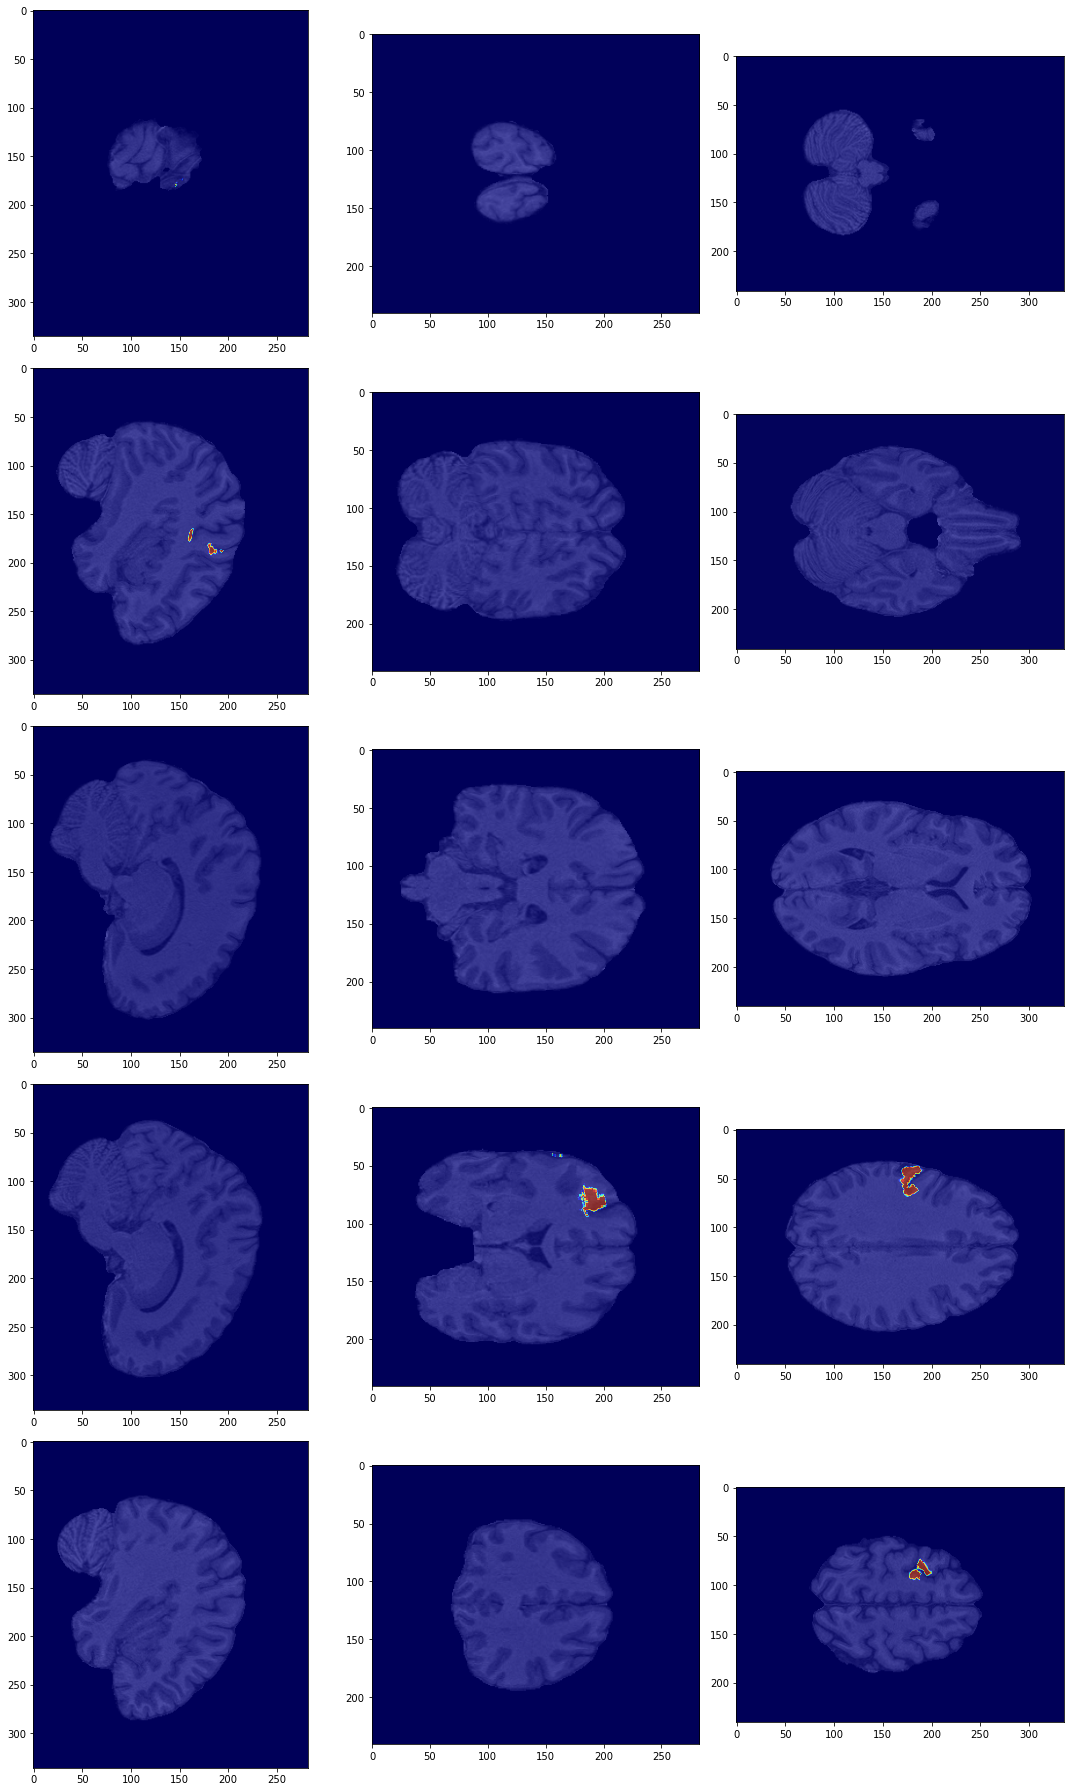

In [77]:
show_slices(brain_tensor, mask_tensor=label_tensor)